In [20]:
# Objective:

# Determine the factors that contribute the most in the calculation of insurance costs.
# Predict the health Insurance Cost.

# Actions to Perform:
# 1. Find the correlation of every pair of features (and the outcome variable).
# 2. Visualize the correlations using a heatmap.
# 3. Normalize your inputs.
# 4. Use the test data to find out the accuracy of the model.
# 5. Visualize how your model uses the different features and which features have a greater effect.

In [ ]:
# We need to use Logistic Regression as we need to determine whether the individual will get the insurance claim

In [22]:
# all the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

In [3]:
#import dataset
dataset = pd.read_csv('insurance2.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
#data wrangling
#missing values
dataset.isna().any()

# no missing values!

age               False
sex               False
bmi               False
children          False
smoker            False
region            False
charges           False
insuranceclaim    False
dtype: bool

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5711107b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f57110972b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f57111077c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f57110979d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5711097d60>,
 'means': []}

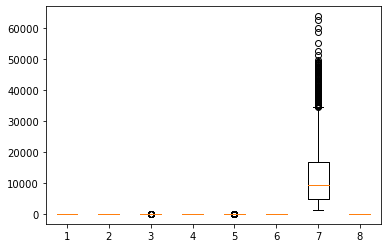

In [18]:
#outliers
plt.boxplot(dataset)

In [11]:
# 1. Find the correlation of every pair of features (and the outcome variable).
dataset.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


<AxesSubplot:>

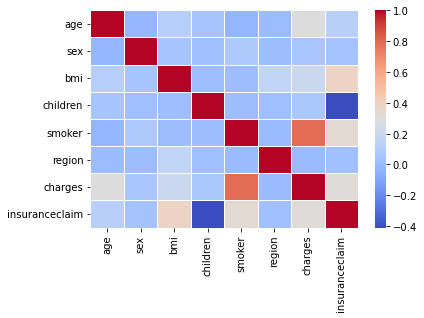

In [15]:
# 2. Visualize the correlations using a heatmap.
sns.heatmap(dataset.corr(), linewidth = 0.5, cmap = 'coolwarm')

In [19]:
# 3. Normalize your inputs.
from sklearn.preprocessing import normalize
normalize(dataset, norm = 'l2')

array([[1.12526190e-03, 0.00000000e+00, 1.65235826e-03, ...,
        1.77672932e-04, 9.99997982e-01, 5.92243105e-05],
       [1.04288662e-02, 5.79381457e-04, 1.95657118e-02, ...,
        1.15876291e-03, 9.99753005e-01, 5.79381457e-04],
       [6.29259576e-03, 2.24735563e-04, 7.41627357e-03, ...,
        4.49471125e-04, 9.99952346e-01, 0.00000000e+00],
       ...,
       [1.10405678e-02, 0.00000000e+00, 2.26024957e-02, ...,
        1.22672976e-03, 9.99682626e-01, 6.13364878e-04],
       [1.04570071e-02, 0.00000000e+00, 1.28471802e-02, ...,
        1.49385816e-03, 9.99861675e-01, 0.00000000e+00],
       [2.09323914e-03, 0.00000000e+00, 9.97548553e-04, ...,
        3.43153957e-05, 9.99997310e-01, 3.43153957e-05]])

In [29]:
#initialize our model
model = LogisticRegression()

#split the data
used_features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
x_train, x_test, y_train, y_test = train_test_split(dataset[used_features], dataset['insuranceclaim'], test_size = 0.2)

#train our model
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
#predict the claims
y_pred = model.predict(x_test)
print(len(y_pred))
y_pred

268


array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1])

In [42]:
print(y_test.shape)
y_test.head()

(268,)


48      0
1284    1
69      0
970     1
1301    1
Name: insuranceclaim, dtype: int64

In [46]:
# 4. Use the test data to find out the accuracy of the model.
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(model.score(x_test, y_test))

0.7835820895522388
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       110
           1       0.79      0.85      0.82       158

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

0.7835820895522388


In [ ]:
# 5. Visualize how your model uses the different features and which features have a greater effect.
# for visualization check insuranceclaimPrediction
#ill update the visualization here later